<a href="https://colab.research.google.com/github/deepavjs/SEAR/blob/main/SEAREngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load NameClassificationPair.csv, which adds weightage to the comparison 
import pandas as pd
nameClassificationPath = '/content/drive/MyDrive/config/nameClassificationPairOutput.csv'
nameClassificationMap={}
colnames = ['name','classification']
nc_df = pd.read_csv(nameClassificationPath,names=colnames, header=None)
#print(nc_df)
for k,v in nc_df.iterrows():
  nameClassificationMap[v['name']] =  v['classification']
#nc_dfdict = nc_df.to_dict()
print(nameClassificationMap)

{'cmscertificationnumberccn': 'certification', 'measurecode': 'measure', 'score': 'rating', 'startdate': 'timestamp', 'enddate': 'timestamp', 'state': 'location', 'allages2012': 'number', 'allages2014': 'number', 'ages0202012': 'number', 'ages0202014': 'number', 'ages21342012': 'number', 'ages21342014': 'number', 'ages352012': 'number', 'ages352014': 'number', 'male2012': 'number', 'male2014': 'number', 'female2012': 'number', 'female2014': 'number', 'location': 'location', 'program': 'other', 'servicecategory': 'variety', 'totalcomputable': 'number', 'federalshare': 'other', 'federalsharemedicaid': 'other', 'federalsharearra': 'other', 'federalsharebipp': 'other', 'stateshare': 'other', 'year': 'timestamp', 'companyphonenumber': 'contact', 'createddate': 'timestamp', 'violationdate': 'timestamp', 'consumercity': 'location', 'consumerstate': 'location', 'subject': 'other', 'recordedmessageorrobocall': 'other', 'objectid': 'id', 'allotmentname': 'name', 'allotmentnum': 'number', 'allotm

In [ ]:
# Load the CSV files from the /content/input folder
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = '/content/drive/MyDrive/unittesting/input'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(csv_files)
  
files_dict={}
# loop over the list of csv files
for f in csv_files:
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("/")[-1])
    key = f.split("/")[-1]
    df = pd.read_csv(f)
    files_dict[key] = df

/content/drive/MyDrive/unittesting/input
['/content/drive/MyDrive/unittesting/input/posts_table.csv', '/content/drive/MyDrive/unittesting/input/reactions_table.csv', '/content/drive/MyDrive/unittesting/input/mcdonalds_dataset.csv', '/content/drive/MyDrive/unittesting/input/car data.csv', '/content/drive/MyDrive/unittesting/input/location_22.csv', '/content/drive/MyDrive/unittesting/input/BiotechCropsAllTables2022.csv']
Location: /content/drive/MyDrive/unittesting/input/posts_table.csv
File Name: posts_table.csv
Location: /content/drive/MyDrive/unittesting/input/reactions_table.csv
File Name: reactions_table.csv
Location: /content/drive/MyDrive/unittesting/input/mcdonalds_dataset.csv
File Name: mcdonalds_dataset.csv
Location: /content/drive/MyDrive/unittesting/input/car data.csv
File Name: car data.csv
Location: /content/drive/MyDrive/unittesting/input/location_22.csv
File Name: location_22.csv
Location: /content/drive/MyDrive/unittesting/input/BiotechCropsAllTables2022.csv
File Name: B

In [ ]:
def transformColumnName(colName):
  newStr = ""
  newStr = ''.join(e for e in colName if e.isalnum())
  newStr = newStr.lower()
  return newStr

In [ ]:
# Build field name list for all the datasets

def fieldNameListBuilder(tableList):
  fieldNameList = []
  for tables in tableList:
    for tableFieldNames in tables:
      fieldNameList.append(tableFieldNames)
    
  return fieldNameList

In [ ]:
# Build all possible unique combinations of fields
import itertools
  
def buildFieldCombination(fieldNameList):
  fieldComboList = list(itertools.product(*fieldNameList))
  return fieldComboList

In [ ]:
# Build the nested field related data object per table
fieldType = {
    "int64":"numeric",
    "int32":"numeric",
    "int":"numeric",
    "float":"numeric",
    "float32":"numeric",
    "float64":"numeric",
    "object":"object",
    "bool":"bool",
    }

def buildNestedObj(dataF, tableName):
  finArr = []
  fieldObjectDict = {}
  for cols in dataF:
    nested = {}
    nested["fieldName"] = cols
    # nested["fieldType"] = dataF[cols].dtypes.name
    sourceDataType = dataF[cols].dtypes.name
    nested["fieldType"] = fieldType[sourceDataType]
    nested["fieldSubtype"] = dataF[cols].dtypes.name
    nested["nullValue"] = dataF[cols].isnull().sum()
    nested["uniqueValues"] = len(pd.unique(dataF[cols]))
    #finArr.append(nested)
    key = tableName+"|"+cols
    fieldObjectDict[key] = nested
  return fieldObjectDict#finArr

In [ ]:
# Build the JSON here with TableName, recordCount, Field details
import json
def buildJSON(dataF, tableName, num_records):
  tableDictObj = buildNestedObj(dataF, tableName)
  return tableDictObj

In [ ]:
FIELD_NAME_WTD_AVG = 5/10
FIELD_CLASSIFICATION_WTD_AVG = 3/10
FIELD_TYPE_WTD_AVG = 1/10
FIELD_SUBTYPE_WTD_AVG = 1/10

def transformColumnName(colName):
  newStr = ""
  newStr = ''.join(e for e in colName if e.isalnum())
  newStr = newStr.lower()
  return newStr

def matchEngine(field_1,field_2,fieldDetailsDict1,fieldDetailsDict2):
  #print("@fieldDetailsDict---")
  #print(fieldDetailsDict)

  scoreDict = {}
  node_1 = fieldDetailsDict1#fieldDetailsDict[field_1]
  node_2 = fieldDetailsDict2#fieldDetailsDict[field_2]
  #print(field_1)
  #print(field_2)
  tblnm_1 = field_1.split("|")[0]
  fldnm_1 = field_1.split("|")[1]
  tblnm_2 = field_2.split("|")[0]
  fldnm_2 = field_2.split("|")[1]
  scoreDict["tbl_1"] = tblnm_1
  scoreDict["fld_1"] = fldnm_1
  scoreDict["tbl_2"] = tblnm_2
  scoreDict["fld_2"] = fldnm_2
  scoreDict["fldType_1"]=node_1["fieldType"]
  scoreDict["fldType_2"]=node_2["fieldType"]
  scoreDict["fldSubType_1"]=node_1["fieldSubtype"]
  scoreDict["fldSubType_2"]=node_2["fieldSubtype"]
  #Get the original Field names to split and apply nGrams calculation
  origFlnName_1 = fldnm_1
  origFlnName_2 = fldnm_2
  transformedFlnName_1 = transformColumnName(fldnm_1)
  transformedFlnName_2 = transformColumnName(fldnm_2)
  if transformedFlnName_1 in nameClassificationMap:
    scoreDict["class_1"]=nameClassificationMap[transformedFlnName_1]
  else:
    scoreDict["class_1"] = 'other' # assign to other category if none available and don;t panic

  if transformedFlnName_2 in nameClassificationMap:
    scoreDict["class_2"]=nameClassificationMap[transformedFlnName_2]
  else:
    scoreDict["class_2"]='other'
  # Transform and Normalize the fields before applying scoring algorithm
  fld_1_trnsf = transformColumnName(str(fldnm_1))
  fld_2_trnsf = transformColumnName(str(fldnm_2))
  temp_name = matchFunc_ngramCalc(fld_1_trnsf,fld_2_trnsf,origFlnName_1,origFlnName_2)
  #temp_name = matchFunc_ngramCalc(fld_1_trnsf,fld_2_trnsf)#10 - (matchFunc(fld_1_trnsf,fld_2_trnsf))
  #print(fldnm_1 + " ORIG " +fldnm_2)
  #print(fld_1_trnsf + " AND " +fld_2_trnsf)
  #print(temp_name* FIELD_NAME_WTD_AVG)
  scoreDict["fieldName"] = temp_name * FIELD_NAME_WTD_AVG
  #temp_field = matchFunc(node_1["fieldType"],node_2["fieldType"])#10 - (matchFunc(node_1["fieldType"],node_2["fieldType"]))
  temp_field = matchFunc_ngramCalc(node_1["fieldType"],node_2["fieldType"],node_1["fieldType"],node_2["fieldType"])#10 - (matchFunc(node_1["fieldType"],node_2["fieldType"]))
  scoreDict["fieldType"] = temp_field * FIELD_TYPE_WTD_AVG
  #temp_subfield = matchFunc(node_1["fieldSubtype"],node_2["fieldSubtype"])#10 - (matchFunc(node_1["fieldSubtype"],node_2["fieldSubtype"]))
  temp_subfield = matchFunc_ngramCalc(node_1["fieldSubtype"],node_2["fieldSubtype"],node_1["fieldSubtype"],node_2["fieldSubtype"])#10 - (matchFunc(node_1["fieldSubtype"],node_2["fieldSubtype"]))
  scoreDict["fieldSubtype"] = temp_subfield * FIELD_SUBTYPE_WTD_AVG
  
  #if nameClassificationMap[transformedFlnName_1] == nameClassificationMap[transformedFlnName_2] and nameClassificationMap[transformedFlnName_1] != "other":
  if scoreDict["class_1"] == scoreDict["class_2"] and scoreDict["class_1"] != "other":
    scoreDict["fieldClassification"] = 10 * FIELD_CLASSIFICATION_WTD_AVG
  else:
    scoreDict["fieldClassification"] = 0
  scoreDict["totalAvg"] = (scoreDict["fieldName"]+scoreDict["fieldType"]+scoreDict["fieldSubtype"]+scoreDict["fieldClassification"])
  return scoreDict

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def matchFunc_fuzzy(field_1,field_2):
  score = fuzz.token_sort_ratio(field_1.strip(), field_2.strip())
  #score = fuzz.partial_token_sort_ratio(field_1.strip(), field_2.strip())
  #score = fuzz.partial_token_set_ratio(field_1.strip(), field_2.strip())
  return score/10

In [ ]:
#nltk.download('punkt')
import nltk

def matchfunc_jaccard(fld_1,fld_2):
  print("fld_1")
  print(fld_1)
  print("fld_2")
  print(fld_2)
  if len(fld_1) >= 6 and len(fld_2) >= 6:
    ng1_chars = set(nltk.ngrams(fld_1, n=6))
    ng2_chars = set(nltk.ngrams(fld_2, n=6))
  else:
    ng1_chars = set(nltk.ngrams(fld_1, n=3))
    ng2_chars = set(nltk.ngrams(fld_2, n=3))
  print('ng1_chars@jaccard')
  print(ng1_chars)
  print('ng2_chars@jaccard')
  print(ng2_chars)
  jd_sent_1_2 = nltk.jaccard_distance(ng1_chars, ng2_chars)
  jacc_score = 10 - jd_sent_1_2*10
  return jacc_score

import re
def transformColumnNameList(colNameList):
  newColList = []
  for colName in colNameList:
    newStr = ""
    newStr = ''.join(e for e in colName if e.isalnum())
    newStr = newStr.lower()
    newColList.append(newStr)
  return newColList

def edgeNgrams(s, n):
    engrams=[]
    for i in range(n,len(s)+1):
            engrams.append(s[0:i])
    return engrams

def matchfunc_jaccard_ngramCalc(fld_1,fld_2):
  #split the original fields based on non-alpha numeric chars
  fldArr_1_list = re.split(r',|-|;|_|:', fld_1)
  fldArr_2_list = re.split(r',|-|;|_|:', fld_2)
  fldArr_1 = transformColumnNameList(fldArr_1_list)
  fldArr_2 = transformColumnNameList(fldArr_2_list)
  #print("fldArr_1")
  #print(fldArr_1)
  #print("fldArr_2")
  #print(fldArr_2)
  
  score_fldArr_1 = 0.0
  counter=0
  ngramCount = 3
  for f1 in fldArr_1:
    #ng1_chars=set(nltk.ngrams(f1, ngramCount))
    ng1_chars = set(edgeNgrams(f1,ngramCount))
    for f2 in fldArr_2:
      # if length of 2nd string is 0, set ngramcount = 2or1 else code panics
      if len(f2) <= 2 and len(f2) > 0:
          ngramCount = 2
      #ng2_chars=set(nltk.ngrams(f2, ngramCount))
      ng2_chars=set(edgeNgrams(f2, ngramCount))
      counter=counter+1
      #print(ng2_chars)
      score_fldArr_1 = score_fldArr_1 + (nltk.jaccard_distance(ng1_chars, ng2_chars)*10)
  #print(score_fldArr_1, counter)
  #print(score_fldArr_1/counter)
  #jd_sent_1_2 = nltk.jaccard_distance(ng1_chars, ng2_chars)
  jacc_score = 10 - (score_fldArr_1/counter)
  #print(jacc_score)
  return jacc_score

print(matchfunc_jaccard_ngramCalc('company_location','location'))
print(matchfunc_jaccard_ngramCalc('employee_location','location'))
#print(matchfunc_jaccard('employee_location','location'))
print(matchFunc_fuzzy('employee_location','location'))
print(matchFunc_fuzzy('company_location','location'))

5.0
5.0
6.4
6.7


In [ ]:
def matchFunc(fld_1,fld_2):
  jaccard_score = matchfunc_jaccard(fld_1,fld_2)
  fuzzy_score = matchFunc_fuzzy(fld_1,fld_2)
  return (jaccard_score+fuzzy_score)/2

def matchFunc_ngramCalc(fld_1,fld_2, origFld_1, origFld_2):
  jaccard_score = matchfunc_jaccard_ngramCalc(origFld_1,origFld_2)
  fuzzy_score = matchFunc_fuzzy(fld_1,fld_2)
  return (jaccard_score+fuzzy_score)/2
  return jaccard_score

In [ ]:
#
import nltk
from nltk import word_tokenize,sent_tokenize

def matchfunc_custom_token(fld_1,fld_2):
  
  tokens1 = nltk.word_tokenize(fld_1, True)
  tokens2 = nltk.word_tokenize(fld_2, True)
  print("token1")
  print(tokens1)
  print("token2")
  print(tokens2)
  if len(fld_1) >= 6 and len(fld_2) >= 6:
    ng1_tokens = set(nltk.ngrams(tokens1, n=3))
    ng2_tokens = set(nltk.ngrams(tokens2, n=3))
  else:
    ng1_tokens = set(nltk.ngrams(tokens1, n=3))
    ng2_tokens = set(nltk.ngrams(tokens2, n=3))
  print('ng1_tokens')
  print(ng1_tokens)
  print('ng2_tokens')
  print(ng2_tokens)
  jd_sent_1_2 = nltk.jaccard_distance(ng1_tokens, ng2_tokens)
  #print(jd_sent_1_2*10)
  return jd_sent_1_2*10

In [ ]:
def dummy(wordFrequencyMap,):
  for w in sorted(wordFrequencyMap, key=wordFrequencyMap.get, reverse=True):
    print(w, wordFrequencyMap[w])

In [ ]:
#print(files_dict)
####New Code to make direct comparison instead of using Config Files
#PREREQ: Make sure the input file chose has more than 200 records
from tabulate import tabulate
fieldTableNames = []
fieldDetailsList = []
for df in files_dict:
  rDict = {}
  df_sample = files_dict[df].sample(200)
  fileName = df.split(".")[0]
  rDict = buildJSON(df_sample, fileName, 200)
  fieldDetailsList.append(rDict)
  
#print(fieldDetailList)
fieldNameFinalList = []

for tables in fieldDetailsList:
  fieldNameList = []  
  for tableFieldNames in tables:
    fieldNameList.append(tableFieldNames)
  fieldNameFinalList.append(fieldNameList)

#fieldNames = fieldNameListBuilder(fieldDetailList)
print(len(fieldNameFinalList))
#fieldCombo = buildFieldCombination(fieldNameList)
# Build all possible unique combinations of fields

import itertools
  
#def buildFieldCombination(fieldNameList):
from itertools import combinations
  
def rSubset(arr, r):
    # return list of all subsets of length r
    # to deal with duplicate subsets use 
    # set(list(combinations(arr, r)))
    return list(combinations(arr, r))

subsetComboList = rSubset(fieldNameFinalList,2)

#traverse this list and join the dicts
fieldDetailsDict = {}
for items in fieldDetailsList:
  fieldDetailsDict.update(items)

#fieldComboList=[]
scoreList=[]
for subsetCombo in subsetComboList:
  fieldComboList = list(itertools.product(*subsetCombo))
  tblnm_1 = fieldComboList[0][0]
  tblnm_2 = fieldComboList[0][1]
  
  for fld in fieldComboList:
    #if fld[0] == 'Data_Science_Fields_Salary_Categorization|Employee_Location':
      #print('I am @ Employee_Location SPOT 3-'+fld[0])
      #print(fieldDetailsDict[fld[0]])
    scoreList.append(matchEngine(fld[0],fld[1],fieldDetailsDict[fld[0]],fieldDetailsDict[fld[1]]))

#scoreList.sorted(key = lambda i: i[14])
#sortedcolumn = sorted(scoreList, key = lambda x:x[0])
import pandas as pd
scoreList_df = pd.DataFrame (scoreList, columns = ['tbl_1', 'fld_1', 'tbl_2','fld_2','fldType_1','fldType_2','fldSubType_1','fldSubType_2','class_1','class_2','fieldName','fieldType','fieldSubtype','fieldClassification','totalAvg'])
sorted_df = scoreList_df.sort_values(by=['totalAvg','class_1','class_2'], ascending=False)
#print(scoreList_df['totalAvg'])
#pd.histo
import csv
file_name = '/content/drive/MyDrive/config/scoreOutput.csv'
#myFile = open('/content/drive/MyDrive/config/scoreOutput.csv', 'w')
sorted_df.to_csv(file_name)
#writer = csv.DictWriter(myFile, fieldnames=['tbl_1', 'fld_1', 'tbl_2','fld_2','fldType_1','fldType_2','fldSubType_1','fldSubType_2','class_1','class_2','fieldName','fieldType','fieldSubtype','fieldClassification','totalAvg'])
#writer.writeheader()
#writer.writerows(scoreList)
#myFile.close()

6


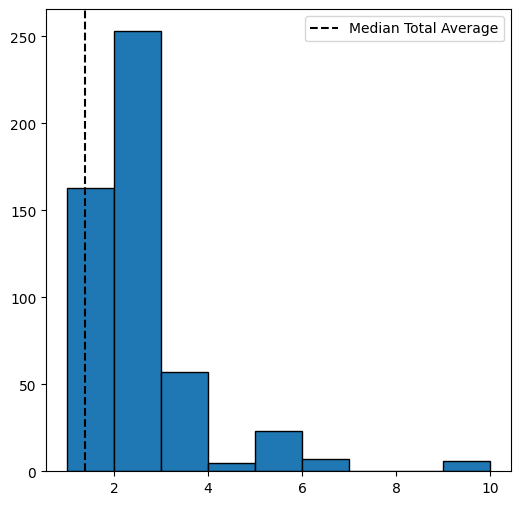

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import numpy as np

# Initialize layout
fig, ax = plt.subplots(figsize = (6, 6))

#plot
bins = [1,2,3,4,5,6,7,8,9,10]
ax.hist(scoreList_df['totalAvg'], bins=bins, edgecolor="black");
median_avg = np.median(scoreList_df['totalAvg'])

# axvline: axis vertical line
ax.axvline(median_avg, color="black", ls="--", label="Median Total Average")
ax.legend();

In [ ]:
from fuzzywuzzy import fuzz

def matchFunc(field_1,field_2):
  score = fuzz.token_sort_ratio(field_1.strip(), field_2.strip())
  #score = fuzz.partial_token_sort_ratio(field_1.strip(), field_2.strip())
  #score = fuzz.partial_token_set_ratio(field_1.strip(), field_2.strip())
  return score/10

print(matchFunc("date","state")*(1/2))

3.35


In [ ]:
import re
#split string with more than 2 delimiters
my_str = 'one,two-thr_ee,four;five'
my_list = re.split(r',|-|;|_', my_str)
# split on comma or hyphen
print(my_list)

['one', 'two', 'thr', 'ee', 'four', 'five']


In [ ]:
# Edge n grams

def egrams(s, n):
    egrams=[]
    for i in range(n,len(s)+1):
            egrams.append(s[0:i])
    return egrams
print(egrams("employe",2))

['em', 'emp', 'empl', 'emplo', 'employ', 'employe']


In [ ]:
# Manual calculation for precision, recall and scatterplot
import pandas as pd
scoreoutputManual = '/content/drive/MyDrive/unittesting/scoreManualOutput/scoreOutputManual.csv'
scoreoutputManualMap={}
colnames = ['manualMatchBucket']
scoreManual_df = pd.read_csv(scoreoutputManual,usecols=["manualMatchBucket"], header=0)
#print(scoreManual_df.manualMatchBucketCategory)
high_match_cnt = 0
no_match_cnt = 0
for k,v in scoreManual_df.iterrows():
  if v.item() == 'high_match':
    high_match_cnt = high_match_cnt+1
    scoreoutputManualMap['high_match'] =  high_match_cnt
  else:
    no_match_cnt = no_match_cnt+1
    scoreoutputManualMap['no_matchtch'] =  no_match_cnt

print(scoreoutputManualMap)
import numpy as np

x = scoreoutputManualMap
y=scoreoutputManualMap

#plt.scatter(x, y)
#plt.show()

{'high_match': 9, 'no_matchtch': 783}


precision score micro
0.9621212121212122
precision score macro
0.6666666666666666
precision score weighted
1.0
[[  6   0   3]
 [  0 756  27]
 [  0   0   0]]


<ipython-input-47-6649640394c4>:86: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


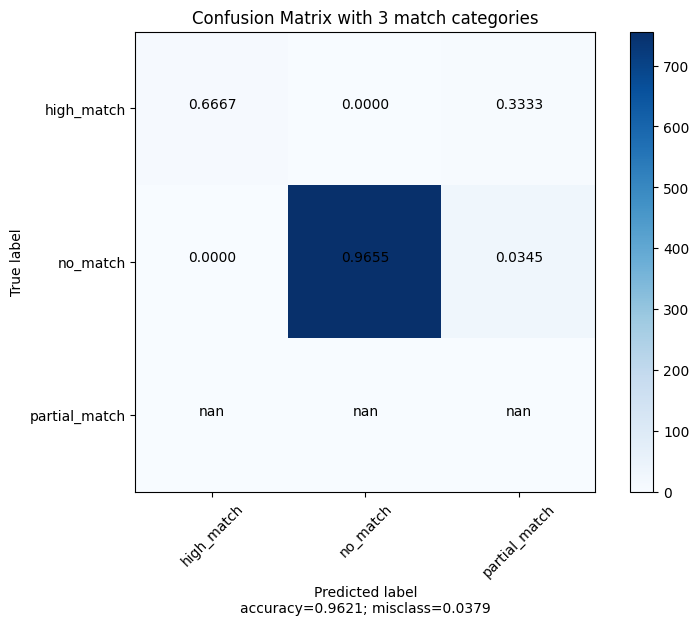

In [ ]:
# Manual calculation for precision, recall and scatterplot
import pandas as pd
scoreoutputManual = '/content/drive/MyDrive/unittesting/scoreManualOutput/scoreOutputManual.csv'
scoreoutputManualMap={}
colnames = ['manualMatchBucket','autoMatchBucket']
scoreManual_df = pd.read_csv(scoreoutputManual,usecols=colnames, header=0)
#print(scoreManual_df.manualMatchBucketCategory)
from sklearn.metrics import precision_score
print("precision score micro")
prec_score_micro = precision_score(scoreManual_df.manualMatchBucket, scoreManual_df.autoMatchBucket, average='micro')
print(prec_score_micro)
print("precision score macro")
prec_score_macro = precision_score(scoreManual_df.manualMatchBucket, scoreManual_df.autoMatchBucket, average='macro')
print(prec_score_macro)
print("precision score weighted")
prec_score_wtd=precision_score(scoreManual_df.manualMatchBucket, scoreManual_df.autoMatchBucket, average='weighted')
print(prec_score_wtd)

from sklearn import metrics
import pylab as pl

cm = metrics.confusion_matrix(scoreManual_df.manualMatchBucket, scoreManual_df.autoMatchBucket)
print(cm)

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


plot_confusion_matrix(cm,['high_match','no_match','partial_match'],'Confusion Matrix with 3 match categories')

[[783   0]
 [  3   6]]


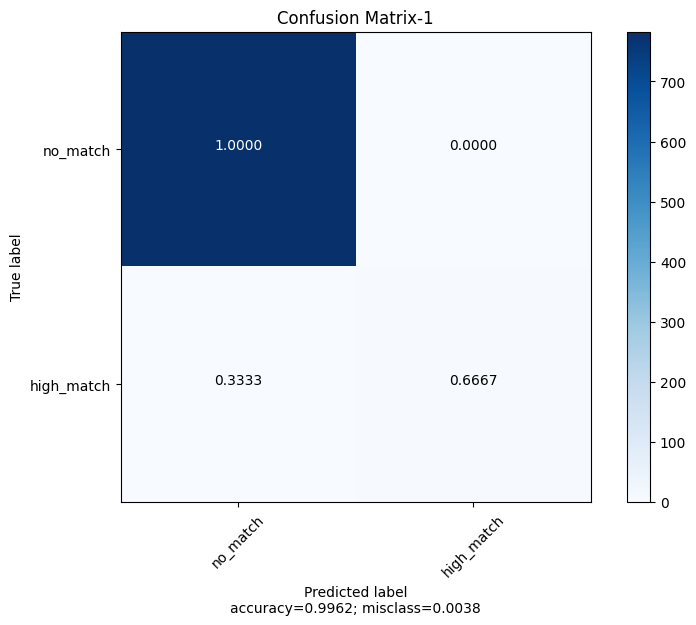

model-1(hm>=10) AUC score: 0.8333333333333333


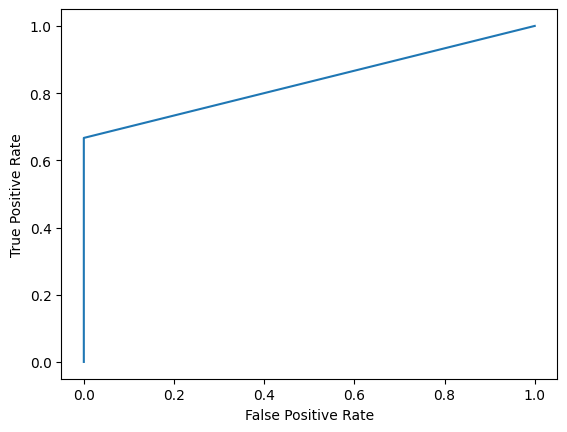

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

import pandas as pd
scoreoutputManual_1 = '/content/drive/MyDrive/unittesting/scoreManualOutput/scoreOutputManual.csv'
scoreoutputManualMap_1={}
colnames_1 = ['manualMatchBucketCategory','autoBinaryMatchBucket_1_category','autoBinaryMatchBucket_2_category','autoBinaryMatchBucket_3_category','autoBinaryMatchBucket_4_category']
scoreManual_df_1 = pd.read_csv(scoreoutputManual_1,usecols=colnames_1, header=0)

cm_1 = metrics.confusion_matrix(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_1_category)
print(cm_1)
plot_confusion_matrix(cm_1,['no_match','high_match'],'Confusion Matrix-1')

plot_roc_curve(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_1_category)
print(f'model-1(hm>=10) AUC score: {roc_auc_score(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_1_category)}')

[[777   6]
 [  2   7]]


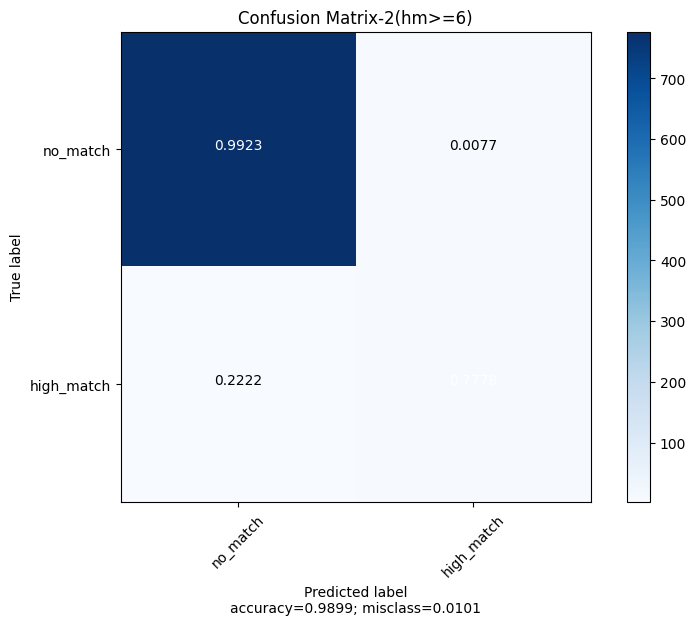

model-2(hm>=6) AUC score: 0.8850574712643677


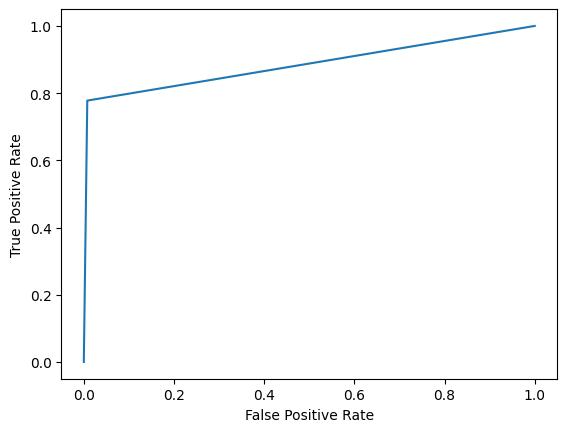

In [ ]:
#Confustion Matrix
cm_1 = metrics.confusion_matrix(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_2_category)
print(cm_1)
plot_confusion_matrix(cm_1,['no_match','high_match'],'Confusion Matrix-2(hm>=6)')

plot_roc_curve(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_2_category)
print(f'model-2(hm>=6) AUC score: {roc_auc_score(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_2_category)}')

[[756  27]
 [  0   9]]


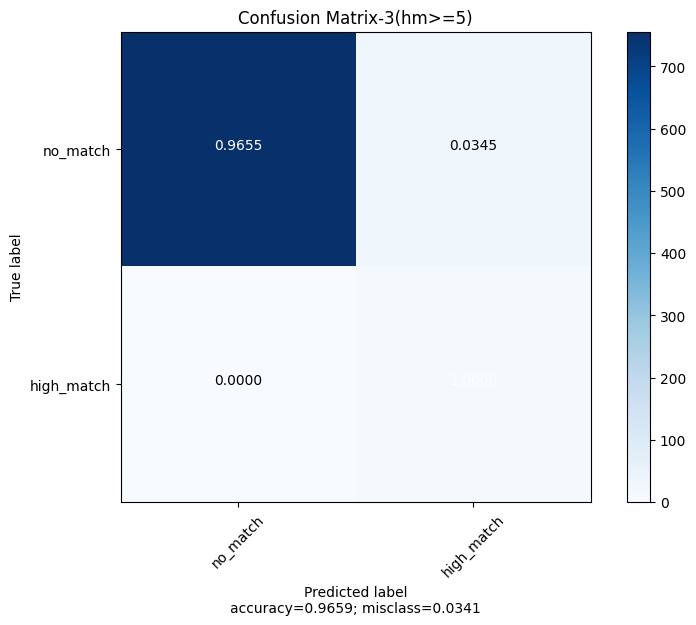

model-3(hm>=5) AUC score: 0.9827586206896552


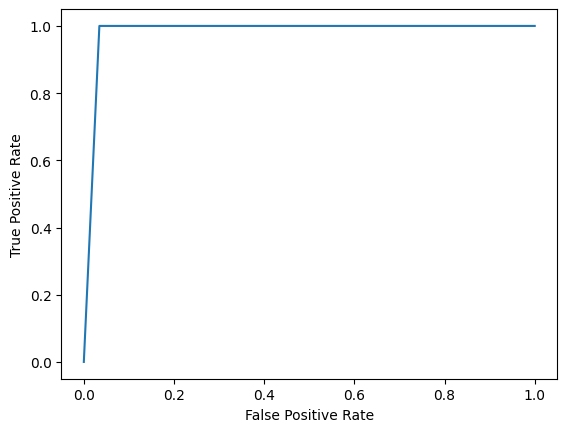

In [ ]:
#Confustion Matrix
cm_1 = metrics.confusion_matrix(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_3_category)
print(cm_1)
plot_confusion_matrix(cm_1,['no_match','high_match'],'Confusion Matrix-3(hm>=5)')

plot_roc_curve(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_3_category)
print(f'model-3(hm>=5) AUC score: {roc_auc_score(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_3_category)}')

[[763  20]
 [  0   9]]


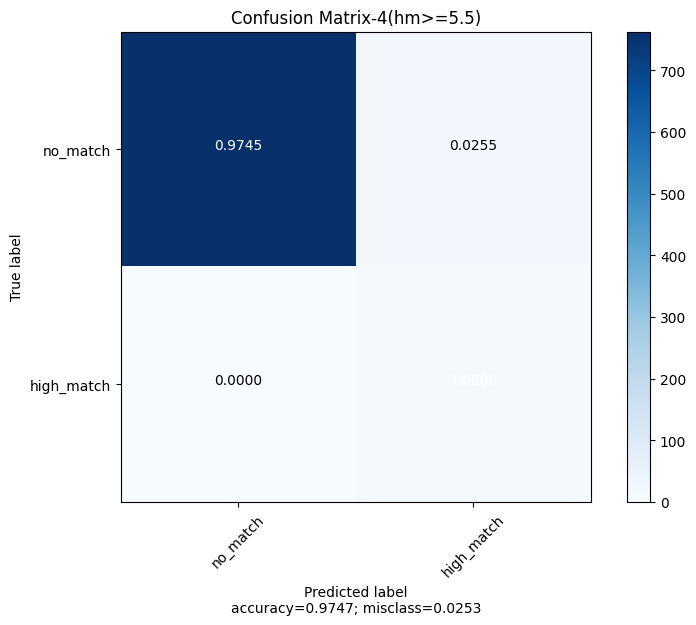

model-4(hm>=5.5) AUC score: 0.9872286079182632


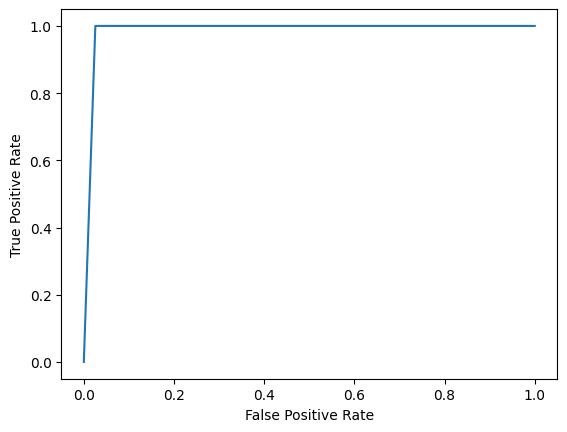

In [ ]:
#Confustion Matrix
cm_1 = metrics.confusion_matrix(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_4_category)
print(cm_1)
plot_confusion_matrix(cm_1,['no_match','high_match'],'Confusion Matrix-4(hm>=5.5)')

plot_roc_curve(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_4_category)
print(f'model-4(hm>=5.5) AUC score: {roc_auc_score(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.autoBinaryMatchBucket_4_category)}')

In [ ]:


from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn import metrics

import pandas as pd
scoreoutputManual_1 = '/content/drive/MyDrive/unittesting/scoreManualOutput/scoreOutputManual.csv'
scoreoutputManualMap_1={}
colnames_1 = ['totalAvg','manualMatchBucketCategory','autoBinaryMatchBucket_1_category']
scoreManual_df_1 = pd.read_csv(scoreoutputManual_1,usecols=colnames_1, header=0)


# Run classifier with crossvalidation and plot ROC curves
cv =  6
print(cv)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)


for i in enumerate(cv):
  scoreManual_df_1["new_column"] = "no_match"
  scoreManual_df_1.loc[df["totalAvg"] >= i, "new_column"] = "high_match"
  fpr, tpr, thresholds = roc_curve(scoreManual_df_1.manualMatchBucketCategory, scoreManual_df_1.new_column)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))


6


TypeError: ignored

In [ ]:
'''
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
   # probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:,1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6,0.6,0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05,1.05])
pl.ylim([-0.05,1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()
'''